In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pickle
import  pandas as pd



def firstRowWithBlack(img,x,y):
 for n in range(0,x):
  for nn in range(0, y):
   if img[n][nn] < 150:
    return n

def firstColumnWithBlack(img,x,y):
 for nn in range(0,y):
  for n in range(0,x):
   if img[n][nn] < 150:
    return nn

def lastRowWithBlack(img,x,y):
 for n in range(x-1,-1,-1):
  for nn in range(y-1,-1,-1):
   if img[n][nn] < 150:
    return n

def lastColumnWithBlack(img,x,y):
 for nn in range(y-1,-1,-1):
  for n in range(x-1,-1,-1):
   if img[n][nn] < 150:
    return nn

def trim(img,x,y):
 if str(type(img[1][1]))=='<class \'numpy.ndarray\'>':
  img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 fr = (firstRowWithBlack(img, x, y))
 fc = (firstColumnWithBlack(img, x, y))
 lr = (lastRowWithBlack(img, x, y))
 lc = (lastColumnWithBlack(img, x, y))
 img = img[fr: lr + 1]
 img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
 img = img[fc:lc + 1]
 img = cv2.rotate(img,cv2.ROTATE_90_COUNTERCLOCKWISE)
 return img

# this function can apply min filter on the image, trim the white edges to the handwritten character, and/or apply thresholding
def preprocess(img,x,y,mask,trimm,threshold):
 if str(type(img[1][1]))=='<class \'numpy.ndarray\'>':
  img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 # show(img)
 if trimm:
  img = trim(img,img.shape[0],img.shape[1])
 # show(img)
 size = (mask, mask)
 shape = cv2.MORPH_RECT
 kernel = cv2.getStructuringElement(shape, size)
 img = cv2.erode(img, kernel)
 # show(img)
 img = cv2.resize(img, (y, x), interpolation=cv2.INTER_AREA)
 # show(img)
 # thresholding
 if threshold:
  for n in range(0, x):
   for nn in range(0, y):
    if img[n][nn] > 150:
     img[n][nn] = 255
    else:
     img[n][nn] = 0
 
 # show(img)
 return img


## each character (alphabet) has a folder of images containing it handwritten
## the following section considers these folders to fill .csv files specified for each character
## where data attributes representing a sample are the values of each pixel in a resized thresholded image containig a character
## note: .csv files are currently filled

# for name in ['A','F','G','H','K','L','V','O','P','Q','R','S','T']:
#  csvFile = open('data\\thresholded\\'+name+'.csv', 'a')
#  for i in range(1, 1100):
#   img = (cv2.imread('images\\'+name+'\\ ('+ str(i) + ').png'))
#   img= preprocess(img, 28, 28, 13, True)
#   img = cv2.bitwise_not(img)
#   img = img/255
#   csvFile.write('\n')
#   for n in range(0, img.shape[0]):
#    for nn in range(0, img.shape[1]):
#     csvFile.write(str(img[n][nn]) + ',')
#   csvFile.write(name)
#   # img = cv2.resize(img, (400, 400), interpolation=cv2.INTER_AREA)
#   # plt.imshow(img)
#   # plt.show()
#   print(name)
#


In [3]:
# using the data files made for each character..
# calculate and save probabilities of being either 0 or 1 for each pixel for each character into persistent dictionary (passive model)

totalNumberOfPixelsInAResizedImage = 784
all =[]
for pixel in range(1,totalNumberOfPixelsInAResizedImage+1):
 print("\ncurrent pixel: {}".format(pixel))
 all.append({'A':[0,0],'F':[0,0],'G':[0,0],'H':[0,0],'K':[0,0],'L':[0,0],'V':[0,0],'O':[0,0],'P':[0,0],'Q':[0,0],'R':[0,0],'S':[0,0],'T':[0,0]})
 for character in ['A','F','G','H','K','L','V','O','P','Q','R','S','T']:
  print(character+'-',end='')
  data = pd.read_csv('data\\thresholded\\'+character+'.csv')
  listOfValuesOfCurrentPixelInAllInstancesOfCurrentCharacter = data[str(pixel)].tolist()
  ValuesLength = len(listOfValuesOfCurrentPixelInAllInstancesOfCurrentCharacter)

  all[len(all)-1][character][0] = listOfValuesOfCurrentPixelInAllInstancesOfCurrentCharacter.count(0) / ValuesLength
  all[len(all)-1][character][1] = 1 - all[len(all)-1][character][0]

file = open('passiveModel', 'wb')
pickle.dump(all, file)
file.close()


current pixel: 1
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 2
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 3
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 4
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 5
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 6
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 7
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 8
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 9
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 10
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 11
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 12
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 13
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 14
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 15
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 16
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 17
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 18
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 19
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 20
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 21
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 22
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 23


A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 182
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 183
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 184
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 185
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 186
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 187
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 188
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 189
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 190
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 191
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 192
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 193
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 194
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 195
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 196
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 197
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 198
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 199
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 200
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 201
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 202
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current

A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 360
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 361
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 362
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 363
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 364
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 365
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 366
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 367
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 368
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 369
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 370
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 371
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 372
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 373
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 374
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 375
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 376
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 377
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 378
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 379
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 380
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current

A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 538
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 539
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 540
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 541
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 542
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 543
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 544
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 545
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 546
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 547
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 548
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 549
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 550
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 551
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 552
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 553
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 554
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 555
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 556
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 557
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 558
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current

A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 716
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 717
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 718
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 719
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 720
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 721
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 722
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 723
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 724
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 725
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 726
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 727
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 728
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 729
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 730
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 731
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 732
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 733
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 734
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 735
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current pixel: 736
A-F-G-H-K-L-V-O-P-Q-R-S-T-
current

image before preprocessing


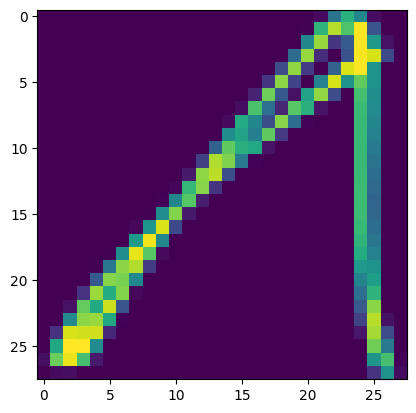

image after preprocessing


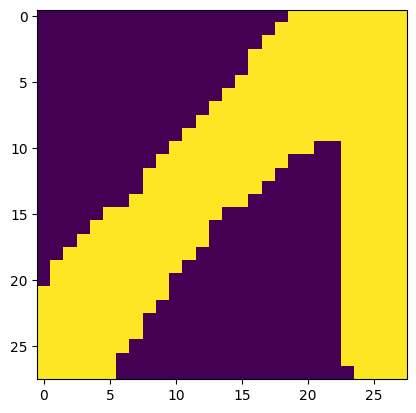

dictionary of probabilities in reversed order
{'A': 0.5735355354097895, 'R': 0.5416884757378443, 'P': 0.5389352985923553, 'K': 0.5154059278800189, 'F': 0.5068463036241444, 'S': 0.4961290352597435, 'T': 0.47961346183819653, 'H': 0.47937268969239377, 'L': 0.46140434134278757, 'V': 0.4605819939655752, 'O': 0.4571507001002634, 'Q': 0.4501043345965151, 'G': 0.3696887641991597}
image before preprocessing


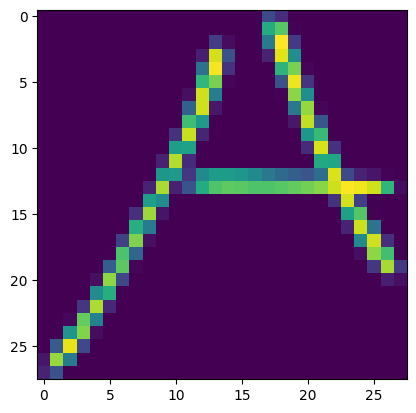

image after preprocessing


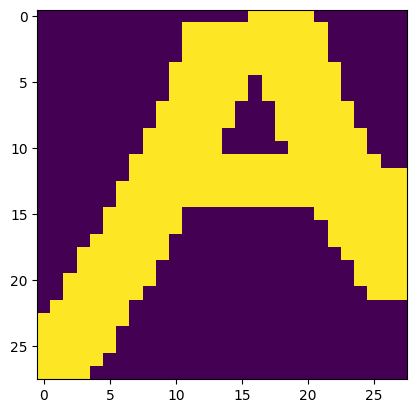

dictionary of probabilities in reversed order
{'A': 0.6467954041598913, 'S': 0.6046695838480268, 'F': 0.5908304196414232, 'K': 0.5678733189567937, 'T': 0.5602546834253378, 'P': 0.5497293348873025, 'H': 0.5218672287009708, 'R': 0.5162387436113964, 'L': 0.4548511516352728, 'G': 0.453761279651614, 'V': 0.44955067497621254, 'O': 0.4466102306062105, 'Q': 0.4347391169826947}
image before preprocessing


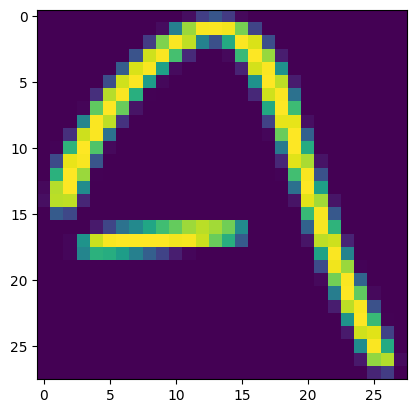

image after preprocessing


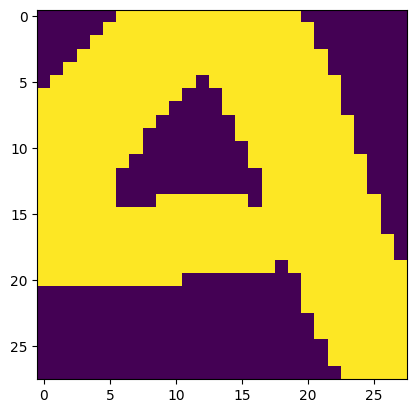

dictionary of probabilities in reversed order
{'A': 0.5831757264456213, 'Q': 0.5675755524383119, 'H': 0.5661064934037741, 'R': 0.5637138929017588, 'G': 0.5337185687666186, 'K': 0.5256160626426313, 'O': 0.49016323653595184, 'P': 0.48898961771896876, 'V': 0.4875926740131246, 'F': 0.48264812139568725, 'S': 0.4475302826222999, 'L': 0.4253676137037737, 'T': 0.4150888530638555}
image before preprocessing


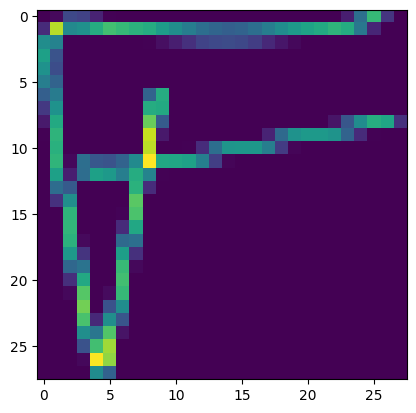

image after preprocessing


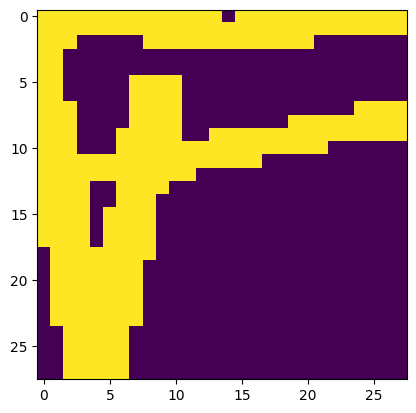

dictionary of probabilities in reversed order
{'F': 0.757675048328902, 'P': 0.6739980040338055, 'T': 0.6370156350685208, 'R': 0.6268613315281246, 'L': 0.5931706783726133, 'K': 0.5911549386205497, 'A': 0.5263953734527187, 'O': 0.5167551824168868, 'S': 0.5082769786934103, 'H': 0.5064973584852989, 'G': 0.49193587784128595, 'Q': 0.46479492494190094, 'V': 0.45948863253052663}
image before preprocessing


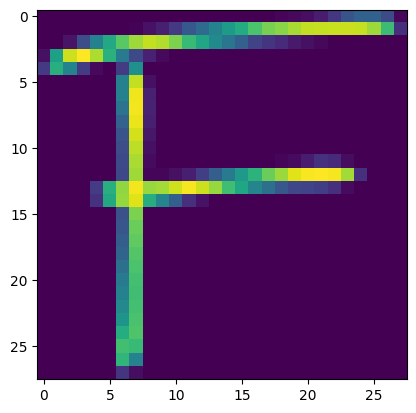

image after preprocessing


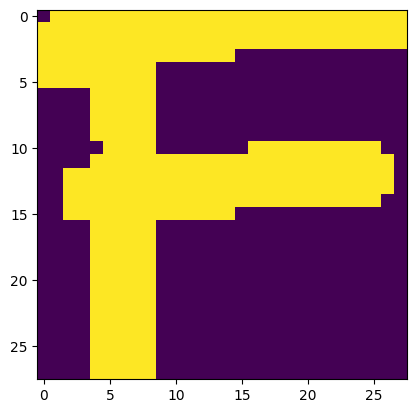

dictionary of probabilities in reversed order
{'P': 0.7559768486531879, 'F': 0.7479604156634494, 'T': 0.6758555553229252, 'R': 0.6026701282024448, 'S': 0.5468493743413657, 'K': 0.5263628052397596, 'A': 0.5257626196009468, 'L': 0.513669344239033, 'H': 0.5120758281049722, 'G': 0.5071336017884611, 'V': 0.48416370644873835, 'O': 0.4594141909009064, 'Q': 0.43839606203779363}
image before preprocessing


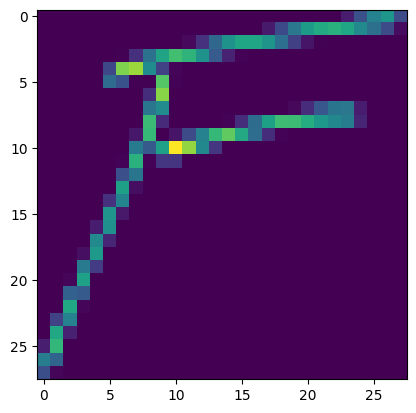

image after preprocessing


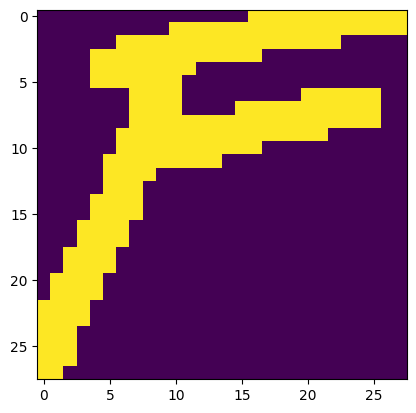

dictionary of probabilities in reversed order
{'F': 0.7819127776730947, 'T': 0.674199229063873, 'P': 0.6115391504814277, 'S': 0.609936329143665, 'K': 0.5936487332128308, 'L': 0.5843842397764883, 'A': 0.5791372680387189, 'R': 0.5622646074250875, 'O': 0.511867624172127, 'H': 0.49267913098702637, 'G': 0.4842172113700286, 'V': 0.44577276227298185, 'Q': 0.4376562983434412}
image before preprocessing


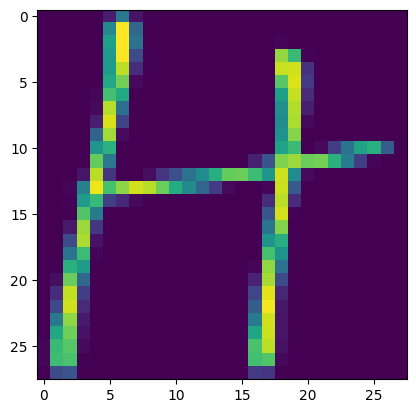

image after preprocessing


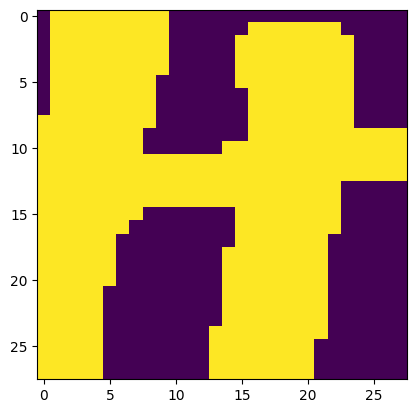

dictionary of probabilities in reversed order
{'H': 0.6446680019633981, 'G': 0.5680664019336212, 'R': 0.5660425201283189, 'P': 0.5524766962804771, 'Q': 0.5439752295477428, 'K': 0.5414209511313963, 'V': 0.5291659978551506, 'L': 0.5225325507657013, 'O': 0.5210541865274602, 'F': 0.5208901823122037, 'A': 0.5107998520472607, 'S': 0.4146480190384466, 'T': 0.35976011184854856}
image before preprocessing


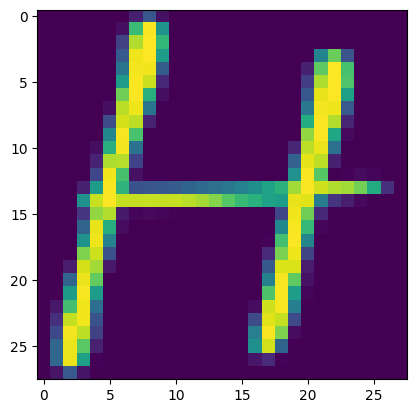

image after preprocessing


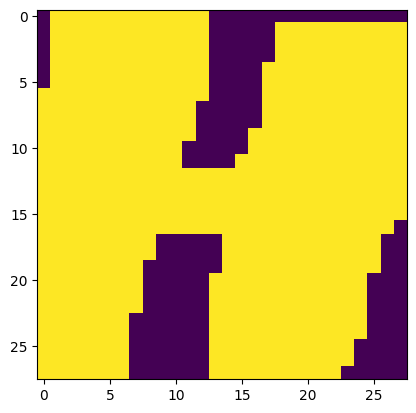

dictionary of probabilities in reversed order
{'H': 0.6310149418308448, 'Q': 0.6036750902023177, 'R': 0.602493329332095, 'V': 0.5632044329990441, 'P': 0.5505132982992409, 'O': 0.5481509397092591, 'G': 0.5191512723702909, 'A': 0.5016435316039608, 'K': 0.48062075013899697, 'F': 0.4225667473893093, 'L': 0.41444563085791664, 'S': 0.3791812351262131, 'T': 0.2992716351801834}
image before preprocessing


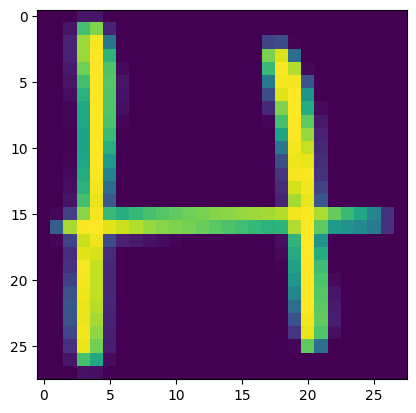

image after preprocessing


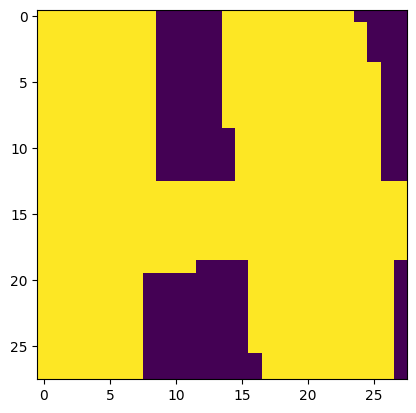

dictionary of probabilities in reversed order
{'H': 0.6161405737123341, 'R': 0.6045032533318438, 'Q': 0.5947583787543586, 'A': 0.5348980033359146, 'P': 0.5209180979233109, 'O': 0.5128679335701511, 'K': 0.5046002600804433, 'V': 0.4950252054705293, 'G': 0.4949996161603475, 'L': 0.4284080890135786, 'F': 0.42048238175994046, 'S': 0.39042657380073353, 'T': 0.29112958194046085}
image before preprocessing


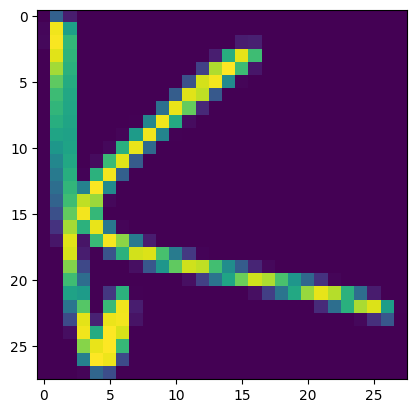

image after preprocessing


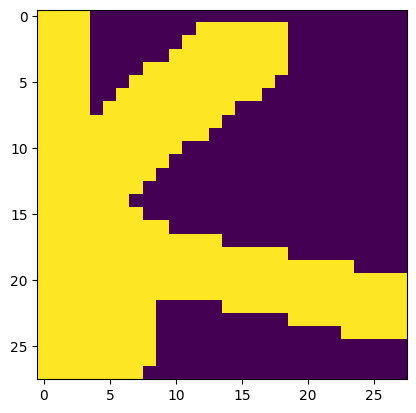

dictionary of probabilities in reversed order
{'K': 0.6241860854636443, 'R': 0.5795932230201432, 'F': 0.5711126929957409, 'L': 0.5694796297459446, 'Q': 0.5272095787766914, 'H': 0.525561394570879, 'T': 0.5238410950363722, 'O': 0.5204098011710603, 'A': 0.517778754824166, 'G': 0.5103834441815723, 'P': 0.48971309730684165, 'V': 0.4726554957696221, 'S': 0.44744886208990203}
image before preprocessing


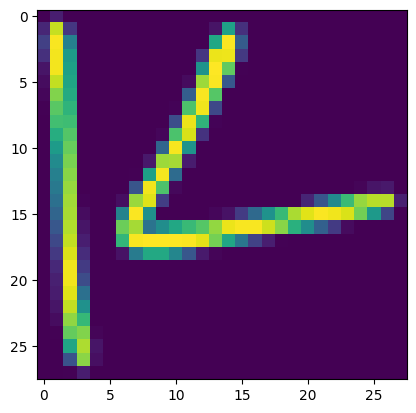

image after preprocessing


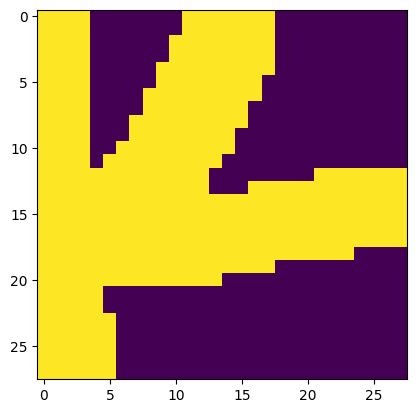

dictionary of probabilities in reversed order
{'K': 0.6507966417519837, 'A': 0.5983292506752079, 'H': 0.5873479471557481, 'R': 0.5781532427471755, 'F': 0.5578132306038837, 'T': 0.5467458539501752, 'G': 0.5334510441601713, 'P': 0.5230908629878542, 'V': 0.4956207385074917, 'L': 0.4903877245752757, 'S': 0.46308160431016987, 'Q': 0.4471918058376193, 'O': 0.43865195513961286}
image before preprocessing


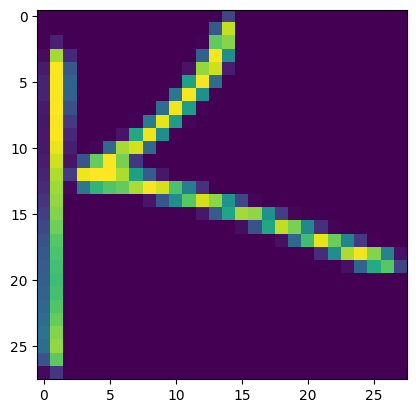

image after preprocessing


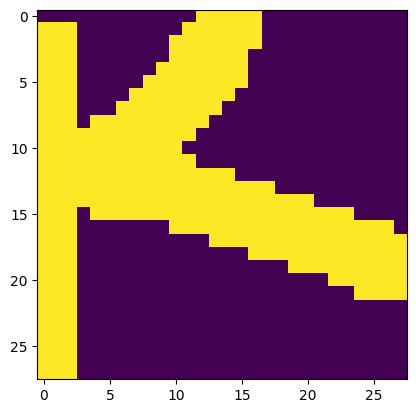

dictionary of probabilities in reversed order
{'K': 0.6449041215073495, 'G': 0.5968939230040917, 'F': 0.5885459921324492, 'A': 0.5873514366071363, 'T': 0.5613154766474281, 'H': 0.5423084349345269, 'L': 0.5375767388517844, 'S': 0.5350875968613545, 'R': 0.5321576208455172, 'P': 0.5264872623392813, 'O': 0.5023902742010896, 'V': 0.47103406402445347, 'Q': 0.45574794064210516}
image before preprocessing


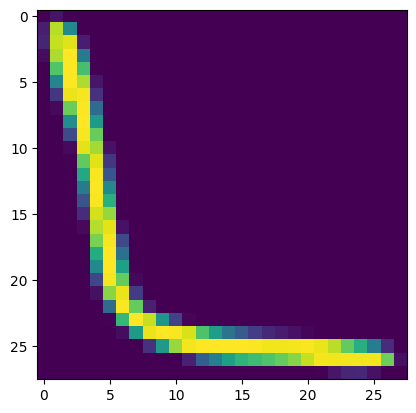

image after preprocessing


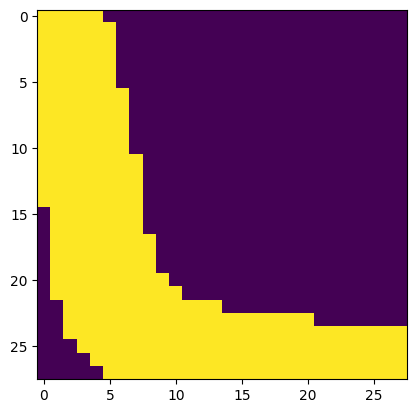

dictionary of probabilities in reversed order
{'L': 0.7353658224520605, 'F': 0.5787569178373766, 'G': 0.5464806556446535, 'O': 0.5346397839331701, 'K': 0.5287519162903869, 'P': 0.5287181849269659, 'T': 0.5231687940688626, 'Q': 0.5041419787980939, 'H': 0.4827295419280843, 'V': 0.4777198528847297, 'R': 0.4725880330427782, 'S': 0.46906019768905255, 'A': 0.42552231271532814}
image before preprocessing


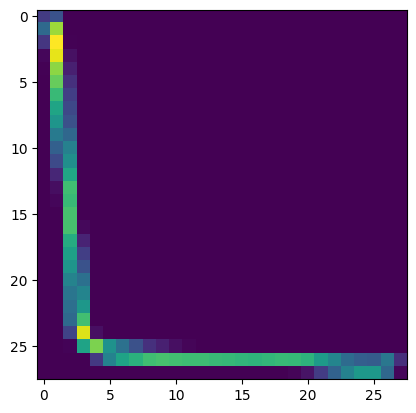

image after preprocessing


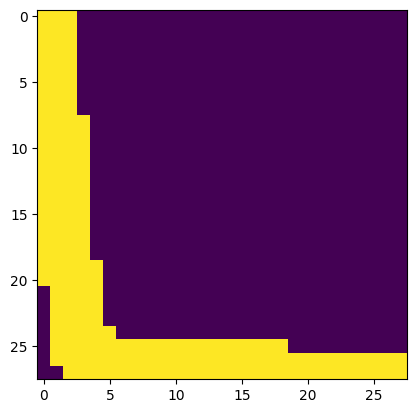

dictionary of probabilities in reversed order
{'L': 0.7664010031009583, 'G': 0.6175561278255838, 'F': 0.5951550130621786, 'O': 0.5854624802555206, 'T': 0.5683688210539528, 'S': 0.5683606790007143, 'K': 0.5682827479197048, 'P': 0.5149557886509079, 'Q': 0.47132252533923247, 'H': 0.46981857179080944, 'A': 0.46609997976118145, 'V': 0.44168545154664124, 'R': 0.4238241130396145}
image before preprocessing


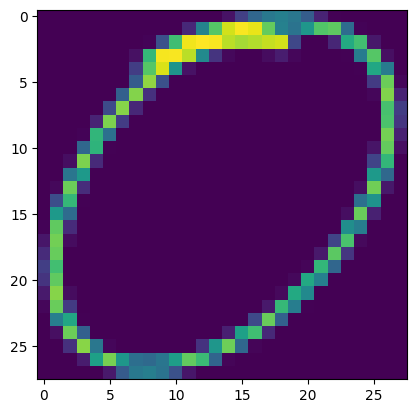

image after preprocessing


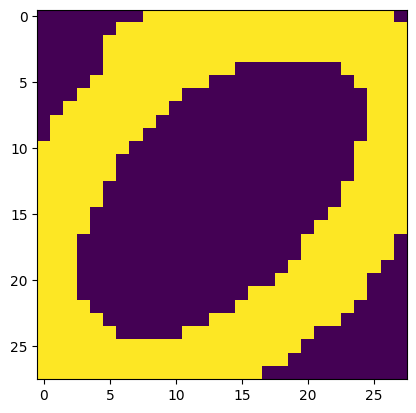

dictionary of probabilities in reversed order
{'O': 0.7966440782846783, 'Q': 0.6820086212712303, 'G': 0.6749413190591511, 'S': 0.5988561578348646, 'L': 0.5796990697122596, 'P': 0.5347595884308388, 'F': 0.5309909809313114, 'H': 0.5227349389462328, 'K': 0.5092016833113494, 'V': 0.5018040463678304, 'T': 0.4954555711417711, 'R': 0.47955995691690717, 'A': 0.47582391763033627}
image before preprocessing


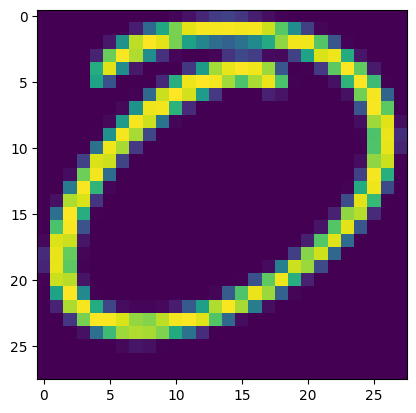

image after preprocessing


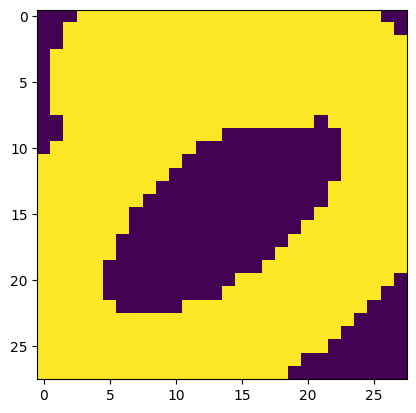

dictionary of probabilities in reversed order
{'O': 0.7242775090900212, 'Q': 0.7200482940072164, 'R': 0.5627438254157674, 'H': 0.5621494555292681, 'G': 0.5368125489977127, 'V': 0.5154547801994573, 'K': 0.5002803192615393, 'P': 0.48723326052011384, 'L': 0.4825690271642158, 'S': 0.4810615841644039, 'A': 0.4809371270648832, 'F': 0.4702815056750117, 'T': 0.41374192482791133}
image before preprocessing


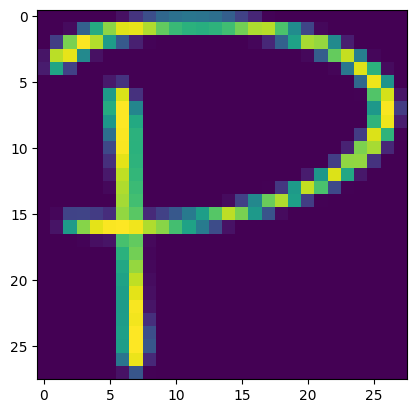

image after preprocessing


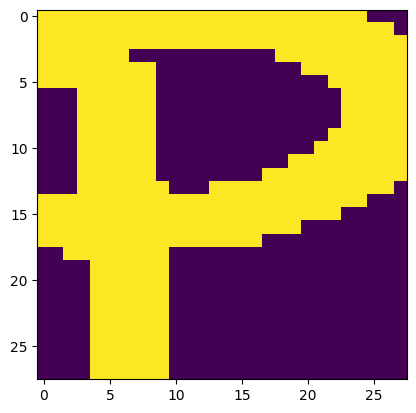

dictionary of probabilities in reversed order
{'P': 0.7765413488358024, 'F': 0.6337204298073581, 'R': 0.6209734638853415, 'T': 0.588677428134748, 'V': 0.5329439105583823, 'H': 0.5300907024730911, 'K': 0.514305587542193, 'A': 0.5047840378535692, 'O': 0.5028834499973242, 'Q': 0.4921987498458832, 'G': 0.482835388620202, 'L': 0.4767672326556822, 'S': 0.4257770426666851}
image before preprocessing


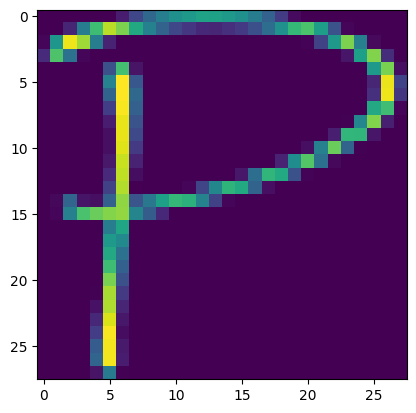

image after preprocessing


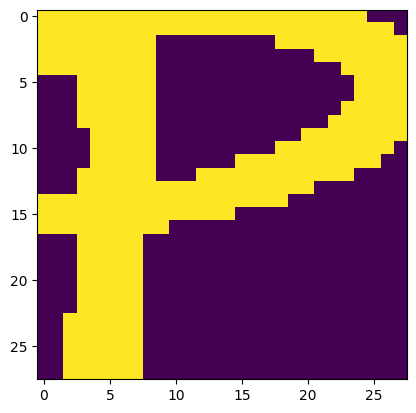

dictionary of probabilities in reversed order
{'P': 0.8256472350750343, 'F': 0.7146082392926171, 'R': 0.6316884059488169, 'T': 0.6024142351006236, 'L': 0.5429644517955556, 'K': 0.5340163352850993, 'H': 0.5306559935980204, 'A': 0.5108231150565177, 'O': 0.50682420376535, 'V': 0.49870773983580957, 'G': 0.4868110369021122, 'S': 0.47481081357722243, 'Q': 0.46616976878895144}
image before preprocessing


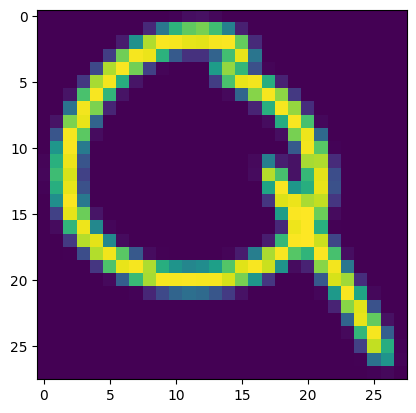

image after preprocessing


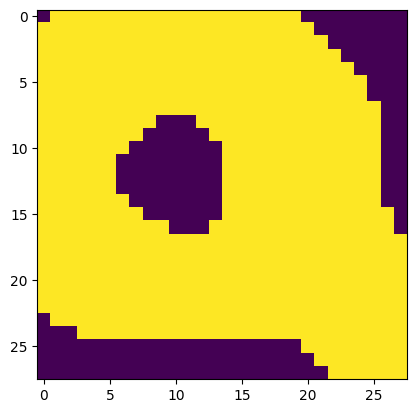

dictionary of probabilities in reversed order
{'Q': 0.627528979893781, 'H': 0.5726131570927749, 'R': 0.5668427676467372, 'V': 0.5174879672084624, 'A': 0.5016505105067378, 'O': 0.4793436109308233, 'G': 0.4787038781762725, 'K': 0.46306415705322873, 'P': 0.42606085137961325, 'F': 0.3869952799354215, 'S': 0.36844768265533273, 'L': 0.3582608109019768, 'T': 0.33983069181863246}
image before preprocessing


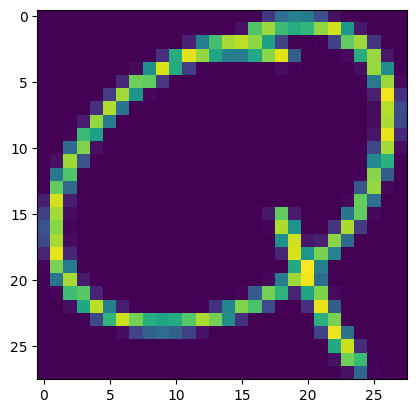

image after preprocessing


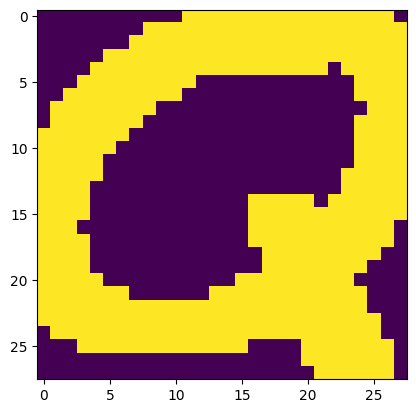

dictionary of probabilities in reversed order
{'O': 0.6992767530422209, 'Q': 0.6862029418401495, 'G': 0.6115635766411467, 'V': 0.5149499728985948, 'H': 0.5118315665077804, 'L': 0.494682076083998, 'S': 0.4920556823389551, 'P': 0.48197582042817866, 'K': 0.4818257740184754, 'A': 0.4797600187965108, 'R': 0.46802615692760785, 'F': 0.45376942170485285, 'T': 0.42974222259443046}
image before preprocessing


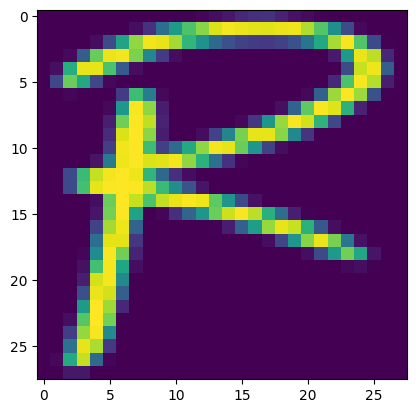

image after preprocessing


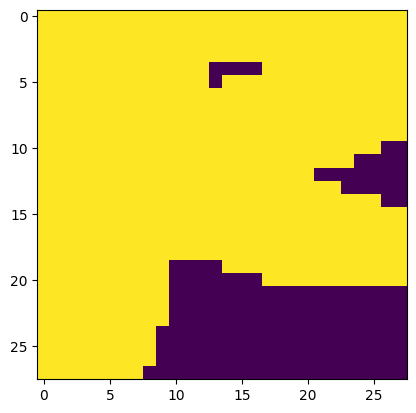

dictionary of probabilities in reversed order
{'R': 0.733875826709191, 'P': 0.6171594935177623, 'H': 0.6141190182079576, 'K': 0.5575445428469737, 'V': 0.5524545964216837, 'Q': 0.5502608946488101, 'A': 0.5397925404834514, 'F': 0.5293602439824404, 'O': 0.48261439003226575, 'G': 0.4598934088915879, 'T': 0.45340302930906545, 'S': 0.3834499973247534, 'L': 0.3571209234484153}
image before preprocessing


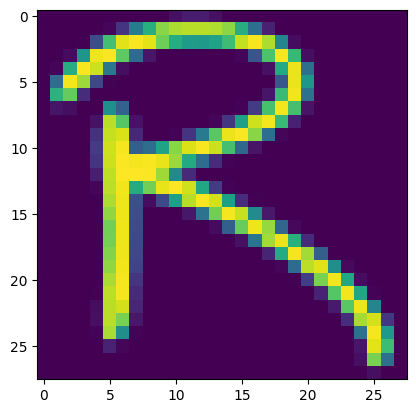

image after preprocessing


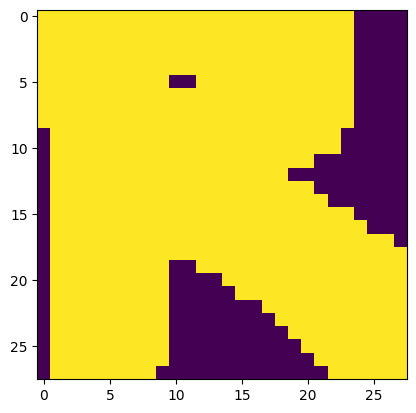

dictionary of probabilities in reversed order
{'R': 0.6880290880667739, 'H': 0.5693795988061425, 'Q': 0.5407556290666646, 'A': 0.5374313450439319, 'K': 0.53161791903077, 'P': 0.4943284783433014, 'F': 0.49194169359360096, 'V': 0.48362865723584264, 'G': 0.4676213805665475, 'O': 0.44428392968057584, 'T': 0.43838443053316567, 'S': 0.4275659680784983, 'L': 0.40333521763708324}
image before preprocessing


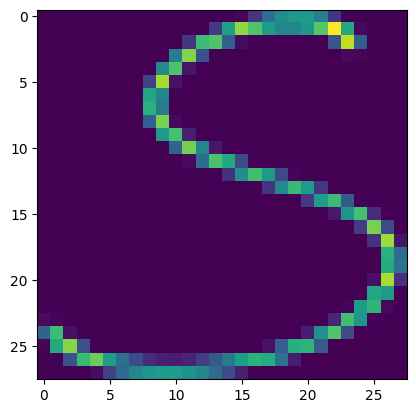

image after preprocessing


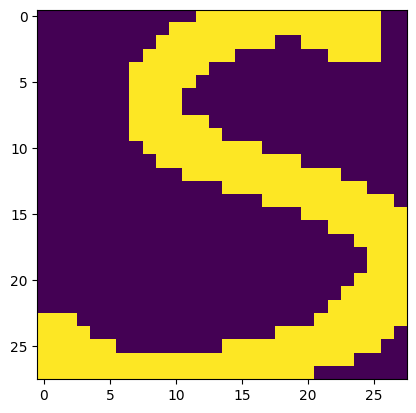

dictionary of probabilities in reversed order
{'S': 0.837755631392965, 'F': 0.5968206445249344, 'T': 0.5964589047309985, 'G': 0.5859789190610125, 'L': 0.5838073171469312, 'O': 0.5764992427890483, 'A': 0.5425701437886599, 'P': 0.49617090867640473, 'K': 0.48670635336045825, 'Q': 0.4784410061716759, 'H': 0.43604068235058774, 'V': 0.41973680231327376, 'R': 0.4120204621429414}
image before preprocessing


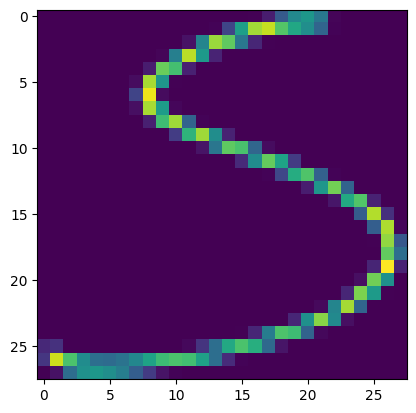

image after preprocessing


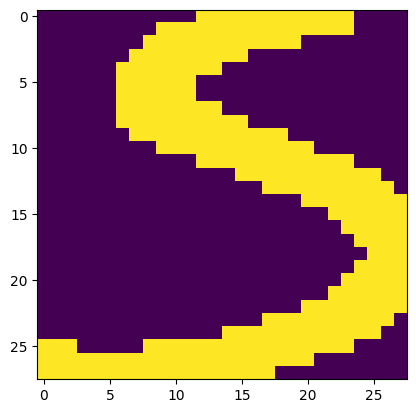

dictionary of probabilities in reversed order
{'S': 0.8284690380978302, 'G': 0.5933625981989783, 'O': 0.5927949807731218, 'F': 0.5880923634519515, 'T': 0.5851042299129732, 'L': 0.5682164483433247, 'A': 0.5395971312056991, 'Q': 0.500694400826302, 'K': 0.46717938339067655, 'P': 0.4658824706246348, 'H': 0.43963481728069403, 'V': 0.42693205107626353, 'R': 0.39463601532567055}
image before preprocessing


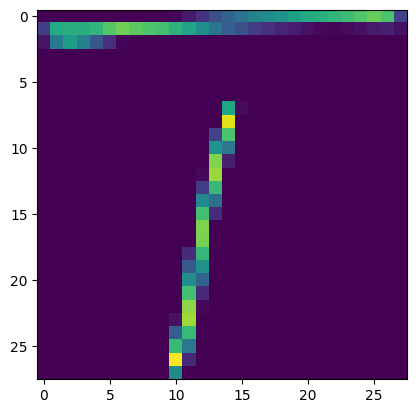

image after preprocessing


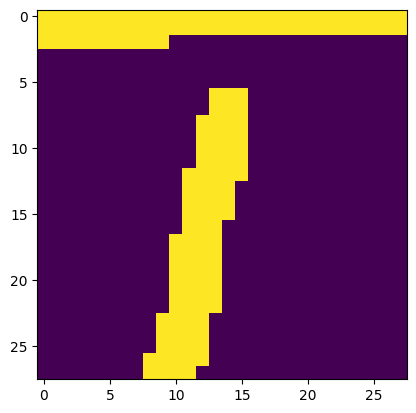

dictionary of probabilities in reversed order
{'T': 0.7792526525646309, 'F': 0.6509187725505781, 'S': 0.5984350973673251, 'L': 0.5837514859247159, 'P': 0.5699332584264435, 'K': 0.529212523873663, 'G': 0.5121863273989399, 'A': 0.4816233858379449, 'V': 0.46104958045162764, 'R': 0.45306571567484877, 'O': 0.44792226432826865, 'H': 0.41572277006609026, 'Q': 0.3632007109175634}
image before preprocessing


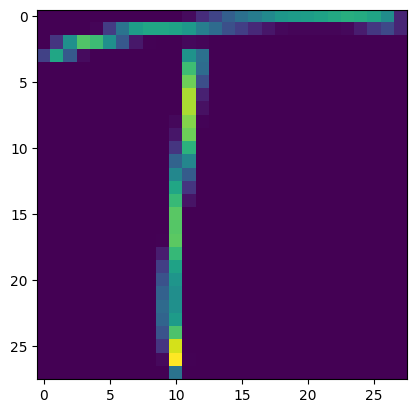

image after preprocessing


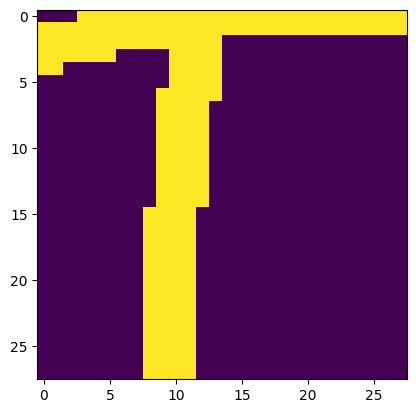

dictionary of probabilities in reversed order
{'T': 0.8398993176959392, 'F': 0.6786296691767443, 'S': 0.5982024672747621, 'P': 0.5842493143228022, 'L': 0.5726224622964781, 'K': 0.5361542058357581, 'A': 0.4967629522619786, 'G': 0.4916357850218794, 'R': 0.4893676416193854, 'O': 0.46379461554387746, 'V': 0.45574096173932827, 'H': 0.4027676002112282, 'Q': 0.3855192419981064}
image before preprocessing


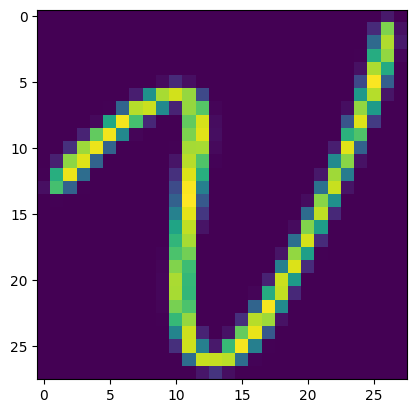

image after preprocessing


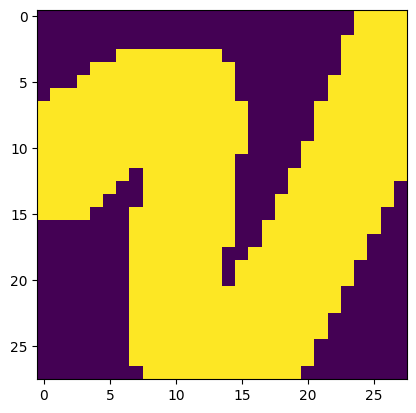

dictionary of probabilities in reversed order
{'V': 0.6694977748931636, 'G': 0.5122002852044935, 'H': 0.5096099491237984, 'Q': 0.49974759634956845, 'O': 0.47873412008830674, 'K': 0.47416991767221006, 'R': 0.4727741371168294, 'T': 0.4674329501915709, 'A': 0.46463208387710614, 'P': 0.45285053283922677, 'S': 0.4367478778319806, 'L': 0.4159647053623566, 'F': 0.392089878962563}
image before preprocessing


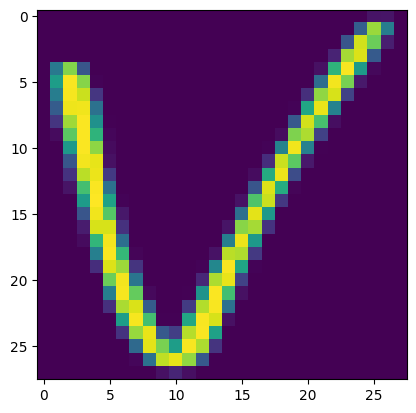

image after preprocessing


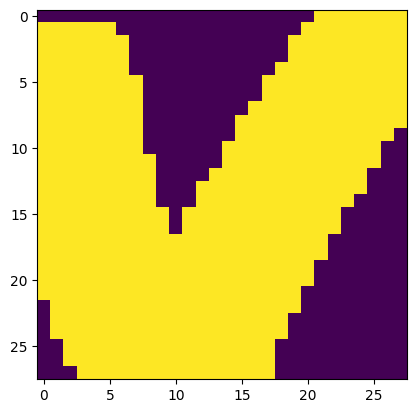

dictionary of probabilities in reversed order
{'V': 0.6537556965293919, 'R': 0.6025468342533853, 'H': 0.5969392858721417, 'P': 0.5790104846382714, 'Q': 0.5064194274042899, 'K': 0.5040070533444068, 'G': 0.4883487218139562, 'L': 0.4692625858695829, 'F': 0.452338746635587, 'O': 0.4424856990650592, 'A': 0.43834255711650344, 'T': 0.37833562473974514, 'S': 0.3100063508015268}


In [5]:
## load the persistent dictionary (passive model)
file = open('passiveModel', 'rb')
all = pickle.load(file)
file.close()
# print(all)



numberOfImagesInTestFolder = 28
for i in range(1,numberOfImagesInTestFolder+1):
## load an image -containing a character- to calculate probabilities for .. and flatten it    
 img = (cv2.imread('test/('+str(i)+').png'))
 imgNoPrePro = preprocess(img, 28, 28, 1, False, False)
 imgNoPrePro = cv2.bitwise_not(imgNoPrePro) / 255
 plt.imshow(imgNoPrePro)
 print('image before preprocessing')
 plt.show()
 img = preprocess(img, 28, 28, 13, True, True)
 img = cv2.bitwise_not(img) / 255
 plt.imshow(img)
 print('image after preprocessing')   
 plt.show()
 img = [x for sublist in img for x in sublist]

 ## for each character, calculate probability of being contained in the image
 pointsDictionary = {'A': 0, 'F': 0, 'G': 0, 'H': 0, 'K': 0, 'L': 0, 'V': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0,
                     'T': 0}

 for i in range(0, totalNumberOfPixelsInAResizedImage):
  for character in ['A', 'F', 'G', 'H', 'K', 'L', 'V', 'O', 'P', 'Q', 'R', 'S', 'T']:
   pointsDictionary[character] += all[i][character][int(img[i])]

 for character in ['A', 'F', 'G', 'H', 'K', 'L', 'V', 'O', 'P', 'Q', 'R', 'S', 'T']:
  pointsDictionary[character] /= 783

 pointsDictionary = {k: v for k, v in sorted(pointsDictionary.items(), key=lambda item: item[1], reverse=True)}

 
 print('dictionary of probabilities in reversed order')
 print(pointsDictionary)
